In [1]:
# Import Libraries
from PyVisualFields import visualFields
from PyVisualFields import vfprogression
import numpy as np
import pandas as pd
from datetime import datetime


In [30]:
#Preproccessing data to match the datatype and structure
m1=pd.read_csv('C:/Users/musa1/PyVisualField/VF_Data_restructured.csv',encoding='windows-1254')
m1['date'] = m1['date'].astype('datetime64')
m1['id']=m1['id'].astype(np.int32)
m1['age']=m1['age'].astype(np.int32)
m1 = m1.apply(lambda x: x.astype('int32') if x.dtype == 'float64' else x)
m1.dtypes


id               int32
eye             object
date    datetime64[ns]
time            object
age              int32
             ...      
l50              int32
l51              int32
l52              int32
l53              int32
l54              int32
Length: 64, dtype: object

In [31]:
print(m1)

         id eye       date     time  age type  fpr  fnr  fl duration  ...  \
0       647  OD 2008-08-13  0:00:00   53  pwg    0    0   0  0:00:00  ...   
1       647  OD 2008-08-13  0:00:00   54  pwg    0    0   0  0:00:00  ...   
2       647  OD 2008-08-13  0:00:00   55  pwg    0    0   0  0:00:00  ...   
3       647  OD 2008-08-13  0:00:00   58  pwg    0    0   0  0:00:00  ...   
4       647  OD 2008-08-13  0:00:00   59  pwg    0    0   0  0:00:00  ...   
...     ...  ..        ...      ...  ...  ...  ...  ...  ..      ...  ...   
28938  7324  OS 2008-08-13  0:00:00   66  pwg    0    0   0  0:00:00  ...   
28939  6859  OD 2008-08-13  0:00:00   79  pwg    0    0   0  0:00:00  ...   
28940  6859  OD 2008-08-13  0:00:00   81  pwg    0    0   0  0:00:00  ...   
28941  1142  OS 2008-08-13  0:00:00   67  pwg    0    0   0  0:00:00  ...   
28942  1142  OS 2008-08-13  0:00:00   68  pwg    0    0   0  0:00:00  ...   

       l45  l46  l47  l48  l49  l50  l51  l52  l53  l54  
0       26   29  

Shape of Total Deviation:(54,)
Type of Total Deviation: <class 'tuple'>


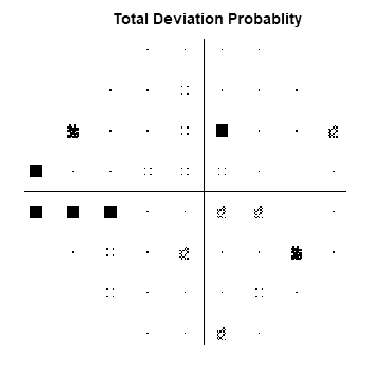

In [3]:

df_td, df_tdp, df_gi, df_gip, df_pd, df_pdp, gh = visualFields.getallvalues(m1)#df_VFs_py data is acquired using 

ind_td_start=df_td.columns.get_loc("l1")
ind_td_end=df_td.columns.get_loc("l54") 

df_td = df_td.fillna(0)
df_tdp = df_tdp.fillna(0)

td = df_td.iloc[0,ind_td_start:ind_td_end+1].to_numpy().astype(np.int8())
print('Shape of Total Deviation:{}'.format(td.shape))
print('Type of Total Deviation:', type(td.shape))
tdp = df_tdp.iloc[0, ind_td_start:ind_td_end+1].to_numpy().astype(np.float16())
vfprogression.plotProbabilities(tdp, title= 'Total Deviation Probablity',
                                 save=True, filename='tdp', fmt='png') 

# 1- HAP2 Criteria

In [27]:
def Fn_HAP2_part2(df_pdp):
    # Load original MTD from dataset
    org_data = pd.read_csv('C:/Users/musa1/PyVisualField/VF_Data_org.csv', encoding='windows-1254')
    # Select columns l1 to l54
    columns_to_check = df_pdp.loc[:, 'l1':'l54']

    # Count the number of values less than 0.05 and 0.01 for each row
    count_05 = (columns_to_check <= 0.05).sum(axis=1)
    count_01 = (columns_to_check <= 0.01).sum(axis=1)

    # Add the count as new columns to the DataFrame
    df_pdp['Count_Less_Than_0.05'] = count_05
    df_pdp['Count_Less_Than_0.01'] = count_01

    # Merge the DataFrames based on the common column 'ID'
    df_pdp = df_pdp.set_index(org_data.index)
    df_pdp['MTD'] = org_data['MTD'].values

    # Define a function to apply the conditions and create the new column
    def stage_classification(row):
        if 0.01 <= abs(row['MTD']) <= 6 and 1 <= row['Count_Less_Than_0.05'] <= 12 and 1 <= row['Count_Less_Than_0.01'] <= 4:
            return "Stage 1"
        elif 6.01 <= abs(row['MTD']) <= 12 and 13 <= row['Count_Less_Than_0.05'] <= 26 and 5 <= row['Count_Less_Than_0.01'] <= 13:
            return "Stage 2"
        elif 12.01 <= abs(row['MTD']) and row['Count_Less_Than_0.05'] >= 27 and row['Count_Less_Than_0.01'] >= 14:
            return "Stage 3"
        else:
            return "No-GL"
    
    df_pdp['Stage'] = df_pdp.apply(stage_classification, axis=1)
    
    return df_pdp

In [28]:
HAP2_part2_result = Fn_HAP2_part2(df_pdp.copy())
HAP2_part2_result

,id,eye,date,time,age,type,fpr,fnr,fl,duration,...,l49,l50,l51,l52,l53,l54,Count_Less_Than_0.05,Count_Less_Than_0.01,MTD,Stage
0,647,OD,2008-08-13,0:00:00,53,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,0,0,-4.623269,No-GL
1,647,OD,2008-08-13,0:00:00,54,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,2,0,-2.265192,No-GL
2,647,OD,2008-08-13,0:00:00,55,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,5,1,-2.879615,Stage 1
3,647,OD,2008-08-13,0:00:00,58,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.05,0.95,0.95,8,2,-4.220192,Stage 1
4,647,OD,2008-08-13,0:00:00,59,pwg,0,0,0,0:00:00,...,0.05,0.95,0.95,0.95,0.95,0.95,6,2,-4.464231,Stage 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28938,7324,OS,2008-08-13,0:00:00,66,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,6,3,-4.234231,Stage 1
28939,6859,OD,2008-08-13,0:00:00,79,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,17,15,-6.987692,No-GL
28940,6859,OD,2008-08-13,0:00:00,81,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,13,11,-7.356154,Stage 2
28941,1142,OS,2008-08-13,0:00:00,67,pwg,0,0,0,0:00:00,...,0.95,0.95,0.95,0.95,0.95,0.95,9,6,-3.712500,No-GL


Classification Results for total eyes:
No-GL      15172
Stage 1     8459
Stage 2     1806
Stage 3     3506
Name: Stage, dtype: int64


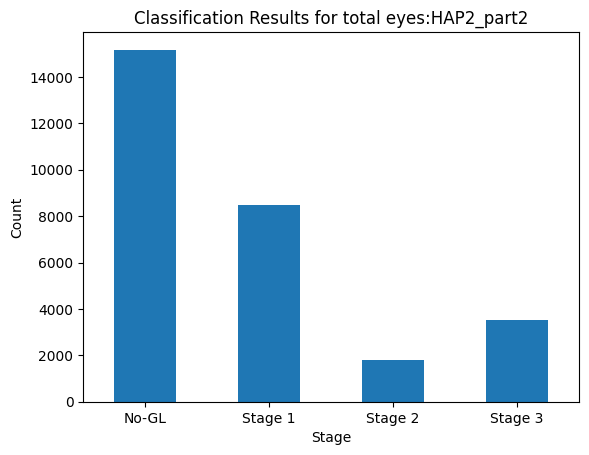

In [26]:
# Display the count of each unique value in the 'Stage' column
classification_results = HAP2_part2_result['Stage'].value_counts()
stage_order = ['No-GL', 'Stage 1', 'Stage 2', 'Stage 3']

# Reorder the DataFrame based on the custom order
classification_results_ordered = classification_results.reindex(stage_order)

# Display the classification results
print("Classification Results for total eyes:")
print(classification_results_ordered)

import matplotlib.pyplot as plt
# Visualizing


# Plot the ordered DataFrame
classification_results_ordered.plot(kind='bar', rot=0)
plt.title('Classification Results for total eyes:HAP2_part2')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

Classification Results for OD Eyes:
No-GL      7692
Stage 1    4219
Stage 2     837
Stage 3    1685
Name: Stage, dtype: int64

Classification Results for OS Eyes:
No-GL      7480
Stage 1    4240
Stage 2     969
Stage 3    1821
Name: Stage, dtype: int64


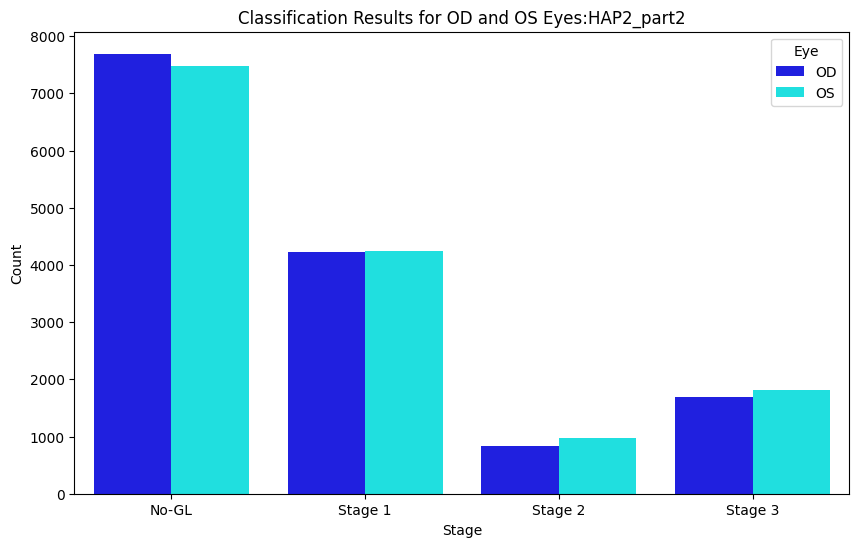

In [25]:
import seaborn as sns

# Filter the DataFrame for 'OD' eyes
df_od = HAP2_part2_result[HAP2_part2_result['eye'] == 'OD']

# Filter the DataFrame for 'OS' eyes
df_os = HAP2_part2_result[HAP2_part2_result['eye'] == 'OS']
stage_order = ['No-GL', 'Stage 1', 'Stage 2', 'Stage 3']

# Display the count of each unique value in the 'Stage' column for 'OD' eyes
classification_results_od = df_od['Stage'].value_counts()
classification_results_ordered_od = classification_results_od.reindex(stage_order)

# Display the count of each unique value in the 'Stage' column for 'OS' eyes
classification_results_os = df_os['Stage'].value_counts()
classification_results_ordered_os = classification_results_os.reindex(stage_order)

# Display the classification results for 'OD' eyes
print("Classification Results for OD Eyes:")
print(classification_results_ordered_od)

# Display the classification results for 'OS' eyes
print("\nClassification Results for OS Eyes:")
print(classification_results_ordered_os)

# Visualizing
# Concatenate 'OD' and 'OS' eyes into one DataFrame
df_both = pd.concat([HAP2_part2_result[HAP2_part2_result['eye'] == 'OD'], HAP2_part2_result[HAP2_part2_result['eye'] == 'OS']])

# Plot a bar plot with 'eye' as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', data=df_both, hue='eye', palette={'OD': 'blue', 'OS': 'cyan'}, order=stage_order)
plt.title('Classification Results for OD and OS Eyes:HAP2_part2')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.legend(title='Eye', loc='upper right')

# Show the plot
plt.show()

In [18]:
# save tdp and pdp into the excel file
# We need to merge these new data into the original VFs

directory_path = '/Users/musa1/OneDrive - University of Massachusetts/Desktop/VF_Harvard/'
name1 = 'TDP_data'
name2 = 'PDP_data'
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_file_name1 = f'{name1}_{timestamp}.csv'
csv_file_name2 = f'{name2}_{timestamp}.csv'

csv_file_path1 = f'{directory_path}{csv_file_name1}'
csv_file_path2 = f'{directory_path}{csv_file_name2}'


df_tdp.to_csv(csv_file_path1, index=False)
df_pdp.to_csv(csv_file_path2, index=False)